In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'D:/000000001_ENEM/DADOS_PROCESSADOS/'

In [9]:
enem_rs = pd.read_csv(path+'enem_RS.csv', sep = ';', encoding = 'ISO-8859-1')
medias_gerais = pd.read_csv(path+'medias_gerais.csv', sep = ';', encoding = 'ISO-8859-1')

In [4]:
medias_gerais

,NU_ANO,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,2019,507.248663,477.824087,520.517658,523.124122,571.188348
1,2018,568.097735,493.683265,526.453759,535.405566,508.680552
2,2017,518.825950,510.861932,510.205567,518.759652,522.557921
3,2016,534.440918,477.677301,520.907494,490.085402,529.966515
4,2015,558.487824,478.923950,505.454785,467.931176,388.409857


In [28]:
 medias_rs = enem_rs[['NU_NOTA_REDACAO','NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_ANO']].groupby(['NU_ANO']).mean().reset_index()

In [49]:
medias_rs.rename(columns = {'NU_NOTA_REDACAO':'NU_NOTA_REDACAO_RS','NU_NOTA_CN':'NU_NOTA_CN_RS', 'NU_NOTA_MT': 'NU_NOTA_MT_RS', 'NU_NOTA_LC': 'NU_NOTA_LC_RS', 'NU_NOTA_CH':'NU_NOTA_CH_RS'}, inplace = True)

In [61]:
comparativo_redacao = pd.merge(medias_rs[['NU_NOTA_REDACAO_RS','NU_ANO']], medias_gerais[['NU_NOTA_REDACAO','NU_ANO']], right_on = 'NU_ANO', left_on = 'NU_ANO', how ='outer')
comparativo_redacao.set_index('NU_ANO', inplace = True)

In [63]:
comparativo_redacao

,NU_NOTA_REDACAO_RS,NU_NOTA_REDACAO
NU_ANO,,
2015,480.715252,388.409857
2016,549.627774,529.966515
2017,545.010482,522.557921
2018,511.988668,508.680552
2019,598.457500,571.188348


In [65]:
comparativo_mt = pd.merge(medias_rs[['NU_NOTA_MT_RS','NU_ANO']], medias_gerais[['NU_NOTA_MT','NU_ANO']], right_on = 'NU_ANO', left_on = 'NU_ANO', how ='outer')
comparativo_mt.set_index('NU_ANO', inplace = True)

In [66]:
comparativo_mt

,NU_NOTA_MT_RS,NU_NOTA_MT
NU_ANO,,
2015,481.310411,467.931176
2016,503.031163,490.085402
2017,534.615512,518.759652
2018,537.199915,535.405566
2019,546.659315,523.124122


In [67]:
comparativo_ch = pd.merge(medias_rs[['NU_NOTA_CH_RS','NU_ANO']], medias_gerais[['NU_NOTA_CH','NU_ANO']], right_on = 'NU_ANO', left_on = 'NU_ANO', how ='outer')
comparativo_ch.set_index('NU_ANO', inplace = True)

In [84]:
comparativo_ch

,NU_NOTA_CH_RS,NU_NOTA_CH
NU_ANO,,
2015,563.331115,558.487824
2016,542.284779,534.440918
2017,527.264478,518.825950
2018,572.852805,568.097735
2019,524.219149,507.248663


In [69]:
comparativo_cn = pd.merge(medias_rs[['NU_NOTA_CN_RS','NU_ANO']], medias_gerais[['NU_NOTA_CN','NU_ANO']], right_on = 'NU_ANO', left_on = 'NU_ANO', how ='outer')
comparativo_cn.set_index('NU_ANO', inplace = True)

In [70]:
comparativo_cn

,NU_NOTA_CN_RS,NU_NOTA_CN
NU_ANO,,
2015,480.806043,478.923950
2016,483.983864,477.677301
2017,515.577535,510.861932
2018,493.743418,493.683265
2019,484.611844,477.824087


In [71]:
comparativo_lc = pd.merge(medias_rs[['NU_NOTA_LC_RS','NU_ANO']], medias_gerais[['NU_NOTA_LC','NU_ANO']], right_on = 'NU_ANO', left_on = 'NU_ANO', how ='outer')
comparativo_lc.set_index('NU_ANO', inplace = True)

In [72]:
comparativo_lc

,NU_NOTA_LC_RS,NU_NOTA_LC
NU_ANO,,
2015,515.599333,505.454785
2016,528.946224,520.907494
2017,518.787580,510.205567
2018,531.141506,526.453759
2019,533.856581,520.517658


In [ ]:
anos = medias_gerais['NU_ANO']

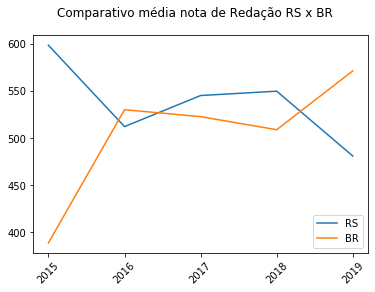

In [80]:
rs_redacao = comparativo_redacao['NU_NOTA_REDACAO_RS']
br_redacao = medias_gerais['NU_NOTA_REDACAO']

fig, ax = plt.subplots()
ax.plot(anos, rs_redacao, label='RS')
ax.plot(anos, br_redacao, label='BR')
ax.legend()
fig.suptitle('Comparativo média nota de Redação RS x BR')
plt.xticks(anos,[str(i) for i in anos],rotation=45)

plt.show()

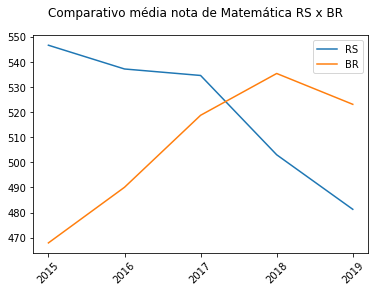

In [87]:
rs_mt = comparativo_mt['NU_NOTA_MT_RS']
br_mt = medias_gerais['NU_NOTA_MT']

fig, ax = plt.subplots()
ax.plot(anos, rs_mt, label='RS')
ax.plot(anos, br_mt, label='BR')
ax.legend()
fig.suptitle('Comparativo média nota de Matemática RS x BR')
plt.xticks(anos,[str(i) for i in anos],rotation=45)

plt.show()

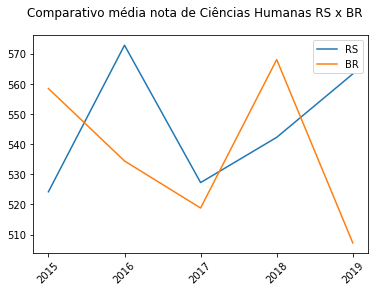

In [94]:
rs_ch = comparativo_ch['NU_NOTA_CH_RS']
br_ch = medias_gerais['NU_NOTA_CH']

fig, ax = plt.subplots()
ax.plot(anos, rs_ch, label='RS')
ax.plot(anos, br_ch, label='BR')
ax.legend()
fig.suptitle('Comparativo média nota de Ciências Humanas RS x BR')
plt.xticks(anos,[str(i) for i in anos],rotation=45)

plt.show()

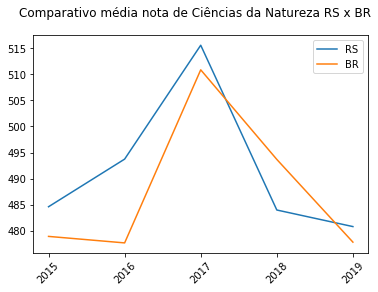

In [93]:
rs_cn = comparativo_cn['NU_NOTA_CN_RS']
br_cn = medias_gerais['NU_NOTA_CN']

fig, ax = plt.subplots()
ax.plot(anos, rs_cn, label='RS')
ax.plot(anos, br_cn, label='BR')
ax.legend()
fig.suptitle('Comparativo média nota de Ciências da Natureza RS x BR')
plt.xticks(anos,[str(i) for i in anos],rotation=45)

plt.show()

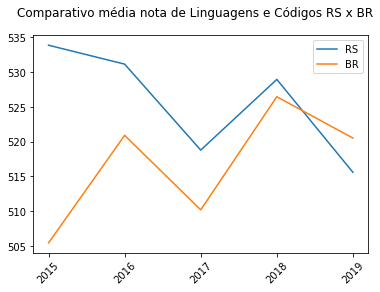

In [92]:
rs_lc = comparativo_lc['NU_NOTA_LC_RS']
br_lc = medias_gerais['NU_NOTA_LC']

fig, ax = plt.subplots()
ax.plot(anos, rs_lc, label='RS')
ax.plot(anos, br_lc, label='BR')
ax.legend()
fig.suptitle('Comparativo média nota de Linguagens e Códigos RS x BR')
plt.xticks(anos,[str(i) for i in anos],rotation=45)

plt.show()